<a href="https://colab.research.google.com/github/Kaif10/Generating-lyrics-with-A.I/blob/master/Eminem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generating new Eminem's lyrics with A.I

In [0]:
#import required dependencies
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

Our data contains lyrics of Eminem's most famous song Rap God.

In [0]:
#define tokenizer
tokenizer = Tokenizer()
data = open('Eminem_songss.txt').read()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

Corpus of lyrics

In [0]:
corpus

['look, i was gonna go easy on you and not to hurt your feelings',
 "but i'm only going to get this one chance",
 "something's wrong, i can feel it (six minutes, slim shady, you're on)",
 "just a feeling i've got, like something's about to happen, but i don't know what",
 "if that means, what i think it means, we're in trouble, big trouble,",
 "and if he is as bananas as you say, i'm not taking any chances",
 'you were just what the doctor ordered',
 "i'm beginning to feel like a rap god, rap god",
 'all my people from the front to the back nod, back nod',
 'now who thinks their arms are long enough to slap box, slap box?',
 'they said i rap like a robot, so call me rapbot',
 'but for me to rap like a computer must be in my genes',
 'i got a laptop in my back pocket',
 "my pen'll go off when i half-cock it",
 'got a fat knot from that rap profit',
 'made a living and a killing off it',
 'ever since bill clinton was still in office',
 'with monica lewinsky feeling on his nut-sack',
 "i'

In [0]:
print(tokenizer.word_index)

#total no of unique words in our text file.
print(total_words)

{'a': 1, 'i': 2, 'the': 3, 'to': 4, 'you': 5, 'and': 6, "i'm": 7, 'in': 8, 'of': 9, 'but': 10, 'it': 11, 'like': 12, 'be': 13, 'that': 14, 'me': 15, 'rap': 16, 'my': 17, 'with': 18, 'what': 19, 'as': 20, 'get': 21, 'from': 22, 'back': 23, 'they': 24, "it's": 25, 'looking': 26, 'boy': 27, 'on': 28, 'for': 29, 'all': 30, 'was': 31, 'this': 32, "don't": 33, 'know': 34, 'if': 35, 'god': 36, 'so': 37, 'when': 38, 'make': 39, 'got': 40, 'say': 41, 'still': 42, 'at': 43, "'cause": 44, 'not': 45, 'can': 46, 'feel': 47, 'just': 48, 'nod': 49, 'are': 50, 'off': 51, 'fuck': 52, 'one': 53, 'while': 54, 'how': 55, 'do': 56, 'take': 57, 'your': 58, "you're": 59, 'think': 60, 'is': 61, 'people': 62, 'front': 63, 'now': 64, 'enough': 65, 'slap': 66, 'box': 67, 'an': 68, "'em": 69, 'into': 70, 'time': 71, 'have': 72, 'up': 73, 'way': 74, 'then': 75, 'go': 76, 'only': 77, 'feeling': 78, 'big': 79, 'beginning': 80, 'said': 81, 'half': 82, 'made': 83, 'these': 84, "i'll": 85, "motherfuckin'": 86, 'let': 8

left: input sequence

right: label

I        |            label: am

I am         |        label: beginning

I am begining |       label: to 

I am beginning to |   label: feel

.....

In [0]:
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
	
	#our xs(input sequence)
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

In [0]:
#one hot encoding the labels.
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [0]:
print(xs[6])

[  0   0   0   0   0   0   0   0   0   0   0 102   2  31 103  76 183  28]


In [0]:
# length of our y vector is 1091. i.e total no of unique words in text
print(ys[6])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [0]:
print(tokenizer.word_index)

{'a': 1, 'i': 2, 'the': 3, 'to': 4, 'you': 5, 'and': 6, "i'm": 7, 'in': 8, 'of': 9, 'but': 10, 'it': 11, 'like': 12, 'be': 13, 'that': 14, 'me': 15, 'rap': 16, 'my': 17, 'with': 18, 'what': 19, 'as': 20, 'get': 21, 'from': 22, 'back': 23, 'they': 24, "it's": 25, 'looking': 26, 'boy': 27, 'on': 28, 'for': 29, 'all': 30, 'was': 31, 'this': 32, "don't": 33, 'know': 34, 'if': 35, 'god': 36, 'so': 37, 'when': 38, 'make': 39, 'got': 40, 'say': 41, 'still': 42, 'at': 43, "'cause": 44, 'not': 45, 'can': 46, 'feel': 47, 'just': 48, 'nod': 49, 'are': 50, 'off': 51, 'fuck': 52, 'one': 53, 'while': 54, 'how': 55, 'do': 56, 'take': 57, 'your': 58, "you're": 59, 'think': 60, 'is': 61, 'people': 62, 'front': 63, 'now': 64, 'enough': 65, 'slap': 66, 'box': 67, 'an': 68, "'em": 69, 'into': 70, 'time': 71, 'have': 72, 'up': 73, 'way': 74, 'then': 75, 'go': 76, 'only': 77, 'feeling': 78, 'big': 79, 'beginning': 80, 'said': 81, 'half': 82, 'made': 83, 'these': 84, "i'll": 85, "motherfuckin'": 86, 'let': 8

Neural Net with two Bidirectional LSTMs stacked and a dense output  layer preceding it

In [0]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(120, return_sequences = True)))

model.add(Bidirectional(LSTM(120)))

#softmax function with the length of one hot encoded vector equal to the total no of unique words in the text.
model.add(Dense(total_words, activation='softmax'))


In [0]:
#compile
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 18, 100)           61300     
_________________________________________________________________
bidirectional_30 (Bidirectio (None, 18, 240)           212160    
_________________________________________________________________
bidirectional_31 (Bidirectio (None, 240)               346560    
_________________________________________________________________
dense_19 (Dense)             (None, 613)               147733    
Total params: 767,753
Trainable params: 767,753
Non-trainable params: 0
_________________________________________________________________


In [0]:

history = model.fit(xs, ys, epochs=40, verbose=1)
#print model.summary()
print(model)

Epoch 1/40
44/44 [==============================] - 5s 107ms/step - loss: 6.1511 - accuracy: 0.0321
Epoch 2/40
44/44 [==============================] - 5s 108ms/step - loss: 5.7834 - accuracy: 0.0335
Epoch 3/40
44/44 [==============================] - 5s 110ms/step - loss: 5.4611 - accuracy: 0.0450
Epoch 4/40
44/44 [==============================] - 5s 111ms/step - loss: 5.2027 - accuracy: 0.0799
Epoch 5/40
44/44 [==============================] - 5s 110ms/step - loss: 4.8440 - accuracy: 0.1135
Epoch 6/40
44/44 [==============================] - 5s 112ms/step - loss: 4.4671 - accuracy: 0.1363
Epoch 7/40
44/44 [==============================] - 5s 113ms/step - loss: 4.0709 - accuracy: 0.1635
Epoch 8/40
44/44 [==============================] - 5s 114ms/step - loss: 3.7198 - accuracy: 0.2213
Epoch 9/40
44/44 [==============================] - 5s 112ms/step - loss: 3.3544 - accuracy: 0.2470
Epoch 10/40
44/44 [==============================] - 5s 112ms/step - loss: 2.9833 - accuracy: 0.3019

In [0]:
import matplotlib.pyplot as plt

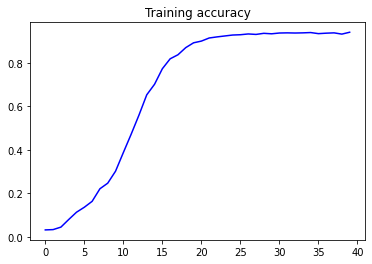

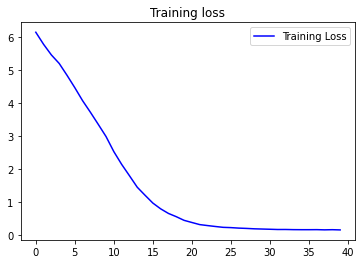

In [0]:
#plot accuracy and loss
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()


.

.

#Now let's generate some new lyrics for Eminem.

In [0]:
#seed text is the input we give and 30 next words is the output we get

seed_text = "I'm beginning to feel like a Rap God"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

I'm beginning to feel like a Rap God rap god rap god rap god rap god rap god wrath of attack attack attack attack attack then i'm practicing wrath of attack then i'm then i'm then i'm cake


In [0]:
#Same here. seed text is the input we give and 30 next words is the output we get

seed_text = "Everybody want the key and the secret to rap immortality like I have got"
next_words = 30
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Everybody want the key and the secret to rap immortality like I have got a mathers lp my was then i'm then i'm then i'm then i'm bake them a cake then you bake them a cake then but bake them but i'm were


#Conclusion

There were a few grammatical mistakes in the lyrics generated and a lot of unnecessary repetition. The reason is our model is basically a text predictor which can predict a few words after we give an input as a seed text. if we try to predict lots of words like i did above 20 words, there will be repition and grammatical errors. The errors can be decreased by training a large network on a corpus containing billions of sentences on a powerful computer ofcourse which is not possible on Google Colab.
This concept of text prediction is also used in Automated Image Captioning.